In [1]:
from google.colab import drive
drive.mount('/content/drive')
resources = "drive/MyDrive/Colab Notebooks/RISORSE"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install d2l

In [3]:
from d2l import torch as d2l
import torch
from torch import nn
from torch.nn import functional as F
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
path = kagglehub.dataset_download("tysonpo/bike-ads-images-prices-specifications")

print("Path to dataset files:", path)

100%|██████████| 196M/196M [00:06<00:00, 30.5MB/s]


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/tysonpo/bike-ads-images-prices-specifications/versions/4


In [4]:
main = print(os.listdir(path))

['images', 'combined_price-only.csv', 'data_ebay.json', 'data_bike_exchange.json']


In [5]:
folder_jpg = os.path.join(path, 'images')
absolute_path = os.path.abspath(folder_jpg)

# Stampa il percorso assoluto della cartella
print(f"Il percorso assoluto della cartella 'images' è: {absolute_path}")

print(os.listdir(folder_jpg))

Il percorso assoluto della cartella 'images' è: /root/.cache/kagglehub/datasets/tysonpo/bike-ads-images-prices-specifications/versions/4/images
['103123761.jpg', '8947.jpg', '1366.jpg', '3710.jpg', '2874.jpg', '140470013.jpg', '5958.jpg', '186020259.jpg', '160161504.jpg', '8231.jpg', '301.jpg', '8658.jpg', '8917.jpg', '174084278.jpg', '563.jpg', '8948.jpg', '7216.jpg', '2545.jpg', '102730884.jpg', '126647475.jpg', '2136.jpg', '5061.jpg', '454.jpg', '3389.jpg', '6198.jpg', '8653.jpg', '113091131.jpg', '2011.jpg', '7152.jpg', '7566.jpg', '186528029.jpg', '6318.jpg', '7141.jpg', '6136.jpg', '4719.jpg', '3320.jpg', '164618032.jpg', '160113912.jpg', '177850224.jpg', '136488083.jpg', '2550.jpg', '183428845.jpg', '835.jpg', '8181.jpg', '8204.jpg', '6815.jpg', '3936.jpg', '3273.jpg', '2581.jpg', '2933.jpg', '7942.jpg', '2377.jpg', '146256158.jpg', '4146.jpg', '6913.jpg', '3388.jpg', '6124.jpg', '8400.jpg', '6066.jpg', '4023.jpg', '4278.jpg', '136691004.jpg', '558.jpg', '3072.jpg', '3933.jpg', 

In [6]:
print("Files in the main folder:", os.listdir(path))

for root, dirs, files in os.walk(path):
    print(f"\nFiles in '{root}': {files}")

Files in the main folder: ['images', 'combined_price-only.csv', 'data_ebay.json', 'data_bike_exchange.json']

Files in '/root/.cache/kagglehub/datasets/tysonpo/bike-ads-images-prices-specifications/versions/4': ['combined_price-only.csv', 'data_ebay.json', 'data_bike_exchange.json']

Files in '/root/.cache/kagglehub/datasets/tysonpo/bike-ads-images-prices-specifications/versions/4/images': ['103123761.jpg', '8947.jpg', '1366.jpg', '3710.jpg', '2874.jpg', '140470013.jpg', '5958.jpg', '186020259.jpg', '160161504.jpg', '8231.jpg', '301.jpg', '8658.jpg', '8917.jpg', '174084278.jpg', '563.jpg', '8948.jpg', '7216.jpg', '2545.jpg', '102730884.jpg', '126647475.jpg', '2136.jpg', '5061.jpg', '454.jpg', '3389.jpg', '6198.jpg', '8653.jpg', '113091131.jpg', '2011.jpg', '7152.jpg', '7566.jpg', '186528029.jpg', '6318.jpg', '7141.jpg', '6136.jpg', '4719.jpg', '3320.jpg', '164618032.jpg', '160113912.jpg', '177850224.jpg', '136488083.jpg', '2550.jpg', '183428845.jpg', '835.jpg', '8181.jpg', '8204.jpg', 

In [7]:
import pandas as pd

# Percorso completo al file CSV
csv_file_path = '/root/.cache/kagglehub/datasets/tysonpo/bike-ads-images-prices-specifications/versions/4/combined_price-only.csv'

# Leggi il file CSV
df = pd.read_csv(csv_file_path)

# Mostra le prime righe del file
print(df.head(50))


    ID    Price
0    0  1399.99
1    2  2995.00
2    3  1049.00
3    4   929.35
4    5   199.00
5    6  2999.99
6    7  3950.00
7    8   900.00
8    9   900.00
9   10   469.85
10  11   585.00
11  12  1099.99
12  13  1199.00
13  14   910.00
14  15  1400.00
15  16  1795.00
16  17   249.00
17  18  6250.00
18  19  1295.00
19  20  1500.00
20  21  2000.00
21  22  2200.00
22  23  1799.95
23  24  1929.99
24  25  3400.00
25  26  6195.00
26  27   749.85
27  28  1249.00
28  29  2400.00
29  30   699.35
30  31   999.99
31  32  2500.00
32  33  1200.00
33  34   640.00
34  35  1200.00
35  36  2200.00
36  37  1300.00
37  38   595.00
38  39  1285.00
39  40  2600.00
40  41  2000.00
41  42  2399.99
42  43  1599.85
43  44  1995.00
44  45  1929.99
45  46  1900.00
46  47  1200.00
47  48  1000.00
48  49  1199.99
49  50  2500.00


In [8]:
print(df['Price'].describe())

count    10052.000000
mean      1921.560166
std       2042.453002
min          0.010000
25%        475.000000
50%       1125.000000
75%       2799.990000
max      15684.630000
Name: Price, dtype: float64


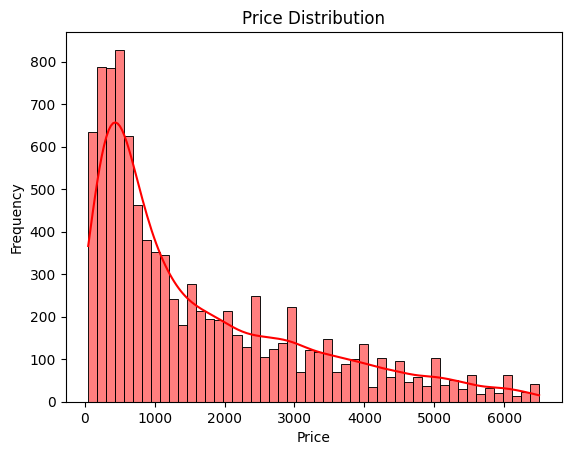

In [14]:
import numpy as np
sns.histplot(df['Price'], bins=50, kde=True, color='red')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

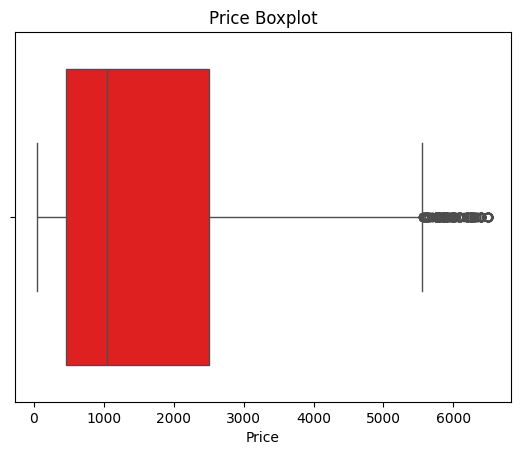

In [15]:
sns.boxplot(x=df['Price'], color='red')
plt.title("Price Boxplot")
plt.show()

As we can see in these two graphs, we have some outliers and a skewed distribution of our quantitative variables(Price). Morover we have also a big range of prices from 0€ to 15650€, so I decided to reduce this range from a minimum of 50€ to a maximum of 6500€.

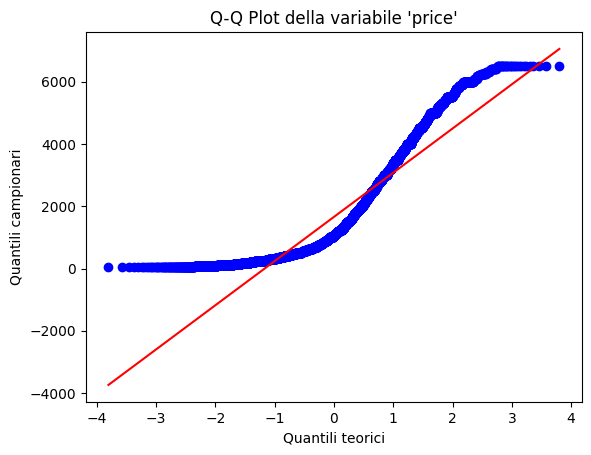

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

price = df['Price']

# Creazione del Q-Q plot
stats.probplot(price, dist="norm", plot=plt)
plt.title("Q-Q Plot della variabile 'price'")
plt.xlabel("Quantili teorici")
plt.ylabel("Quantili campionari")
plt.show()


In [12]:
len_pre_filtering = df.shape[0]
df = df[(df['Price'] >= 50) & (df['Price'] <= 6500)]
len_after_filtering = df.shape[0]
f"We filtered out {len_pre_filtering - len_after_filtering} rows"

'We filtered out 433 rows'

In [13]:
len(df)

9619

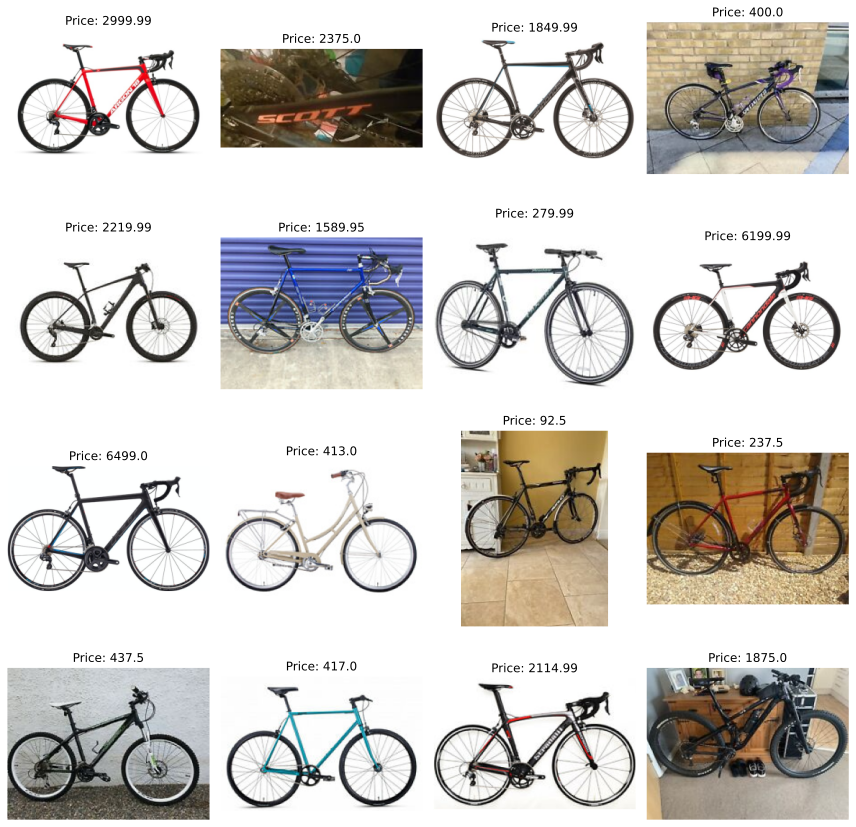

In [38]:
import random
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import os

def display_random_bikes_in_grid(df, n=16, base_path='/root/.cache/kagglehub/datasets/tysonpo/bike-ads-images-prices-specifications/versions/4/images', image_extension='.jpg'):
    # Estrai un campione casuale di righe
    random_rows = df.sample(n)

    # Imposta il layout della griglia (4 righe per 4 colonne)
    rows, cols = 4, 4
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    axes = axes.flatten()

    # Ottieni una lista di tutti i file nella cartella delle immagini
    image_files = os.listdir(base_path)

    # Visualizza ogni immagine nel campione casuale
    for i, (ax, (_, row)) in enumerate(zip(axes, random_rows.iterrows())):
        # Ora 'row' è definito nel contesto del ciclo
        image_filename = str(int(row['ID'])) + '.jpg'  # Aggiungi l'estensione .jpg al valore di ID
        path = Path(base_path) / image_filename # Crea il percorso completo per il file immagine

        # Se il file esiste, apri l'immagine
        if path.is_file():
            image = Image.open(path)
            ax.imshow(image)
            ax.axis('off')  # Disabilita gli assi
            ax.set_title(f"Price: {row['Price']}")  # Mostra il prezzo come titolo
        else:
            ax.text(0.5, 0.5, "Image not found", ha='center', va='center', fontsize=12, color='red')

    # Ottimizza la disposizione delle immagini
    plt.tight_layout()
    plt.show()

# Esegui la funzione (con i dati del tuo DataFrame e il percorso base corretto)
display_random_bikes_in_grid(df, n=16, base_path='/root/.cache/kagglehub/datasets/tysonpo/bike-ads-images-prices-specifications/versions/4/images', image_extension='.jpg')


As we can see we have more or less all pictures of bikes that are very clear and with the bike clearly visible, so I decide to only resize the images.

In [39]:
import os
import random
from PIL import Image
import torch
from torchvision import transforms
from pathlib import Path

# Impostazioni per la riproducibilità
SEED = 42
random.seed(SEED)
torch.manual_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

# Percorso base delle immagini
base_path = '/root/.cache/kagglehub/datasets/tysonpo/bike-ads-images-prices-specifications/versions/4/images'  # Modifica se necessario

# Trasformazioni per i dati di input (Resize, ToTensor)
data_augmentation = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

sample_size = 500  # Numero di immagini da caricare
image_tensors = []  # Lista per memorizzare i tensori delle immagini

# Campione casuale di indici dal DataFrame
sampled_images = random.sample(range(len(df)), min(len(df), sample_size))

# Loop per caricare le immagini
for idx in sampled_images:
    row = df.iloc[idx]

    # Rimuove la parte decimale e converte ID in stringa
    image_filename = str(int(row['ID'])) + '.jpg'  # Assicurati che il nome del file corrisponda all'ID senza decimali

    # Costruisce il percorso dell'immagine
    img_path = Path(base_path) / image_filename

    # Controlla se il file esiste
    if img_path.is_file():
        try:
            # Carica e trasforma l'immagine
            img = Image.open(img_path).convert("RGB")
            tensor = data_augmentation(img)
            image_tensors.append(tensor)
        except Exception as e:
            print(f"Errore con l'immagine {img_path}: {e}")
    else:
        print(f"Immagine non trovata: {img_path}")

# Se ci sono immagini valide, calcola la media e la deviazione standard
if image_tensors:
    stacked_images = torch.stack(image_tensors)

    mean = stacked_images.mean(dim=[0, 2, 3])
    std = stacked_images.std(dim=[0, 2, 3])

    print(f"Media: {mean}")
    print(f"Deviazione standard: {std}")
else:
    print("Nessuna immagine valida trovata.")


Media: tensor([0.6015, 0.5943, 0.5577])
Deviazione standard: tensor([0.3002, 0.2982, 0.3154])


These are our personal tensor of our images present of our dataset.

In [40]:
import random
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import torch
from torchvision import transforms
from pathlib import Path
from torchvision.io import read_image

SEED = 42
random.seed(SEED)
torch.manual_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)


mean = [0.6015, 0.5943, 0.5577]
std = [0.3002, 0.2982, 0.3154]

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

class Bike(Dataset):
    def __init__(self, dataframe, base_path, transform=None):
        self.dataframe = dataframe
        self.base_path = base_path
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        image_filename = str(int(row['ID'])) + '.jpg'
        img_path = Path(self.base_path) / image_filename
        image = Image.open(img_path).convert("RGB")
        #image = read_image(img_path).float() / 255.0
        label = torch.tensor(row['Price_scaled'], dtype=torch.float)

        if self.transform:
            image = self.transform(image)

        return image, label


In [41]:
from sklearn.model_selection import train_test_split
train_dataset, test_dataset = train_test_split(df, test_size=0.3, random_state=42)
test_dataset, val_dataset = train_test_split(test_dataset, test_size=0.5, random_state=42)

In [42]:
import numpy as np

class LogNormScaler:
    def __init__(self, epsilon=1.0):
        """
        Inizializza il trasformatore log-normalizzato.
        :param epsilon: costante per evitare problemi con log(0).
        """
        self.epsilon = epsilon
        self.log_min = None
        self.log_max = None

    def fit(self, prices):
        """
        Calcola i parametri di normalizzazione (min e max dei logaritmi).
        :param prices: array o colonna del dataset da usare per il fitting.
        """
        log_prices = np.log(prices + self.epsilon)
        self.log_min = log_prices.min()
        self.log_max = log_prices.max()

    def transform(self, prices):
        """
        Applica la trasformazione log-normalizzata.
        :param prices: array o colonna del dataset da trasformare.
        :return: array dei prezzi trasformati.
        """
        log_prices = np.log(prices + self.epsilon)
        return (log_prices - self.log_min) / (self.log_max - self.log_min)

    def fit_transform(self, prices):
        """
        Esegue il fitting e trasforma i dati in un unico passaggio.
        :param prices: array o colonna del dataset da trasformare.
        :return: array dei prezzi trasformati.
        """
        self.fit(prices)
        return self.transform(prices)

    def inverse_transform(self, normalized_prices):
        """
        Riporta i prezzi trasformati alla scala originale.
        :param normalized_prices: array di prezzi trasformati.
        :return: array di prezzi nella scala originale.
        """
        if self.log_min is None or self.log_max is None:
            raise ValueError("Devi chiamare il metodo 'fit' prima di 'inverse_transform'.")
        log_prices = normalized_prices * (self.log_max - self.log_min) + self.log_min
        original_prices = np.exp(log_prices) - self.epsilon
        return original_prices

# Creazione di un'istanza del LogNormScaler
scaler = LogNormScaler(epsilon=1.0)

# Fitting dello scaler sul training set e trasformazione dei dati
train_dataset['Price_scaled'] = scaler.fit_transform(train_dataset['Price'])
val_dataset['Price_scaled'] = scaler.transform(val_dataset['Price'])
test_dataset['Price_scaled'] = scaler.transform(test_dataset['Price'])

# Fase 2: Standardizzazione aggiuntiva
# Calcolo dei parametri della standardizzazione sul training set
price_mean = train_dataset['Price_scaled'].mean()
price_std = train_dataset['Price_scaled'].std()

# Applicazione della standardizzazione ai dataset
train_dataset['Price_scaled_standardized'] = (train_dataset['Price_scaled'] - price_mean) / price_std
val_dataset['Price_scaled_standardized'] = (val_dataset['Price_scaled'] - price_mean) / price_std
test_dataset['Price_scaled_standardized'] = (test_dataset['Price_scaled'] - price_mean) / price_std

pd.options.display.float_format = "{:.2f}".format

# Riepilogo statistico dei prezzi log-normalizzati e standardizzati
train_stats = train_dataset['Price_scaled_standardized'].describe()
val_stats = val_dataset['Price_scaled_standardized'].describe()
test_stats = test_dataset['Price_scaled_standardized'].describe()

# Visualizzazione delle statistiche
print("Statistiche del Training Set (log-normalizzato e standardizzato):")
print(train_stats)

print("\nStatistiche del Validation Set (log-normalizzato e standardizzato):")
print(val_stats)

print("\nStatistiche del Test Set (log-normalizzato e standardizzato):")
print(test_stats)


Statistiche del Training Set (log-normalizzato e standardizzato):
count   6733.00
mean      -0.00
std        1.00
min       -2.71
25%       -0.72
50%        0.01
75%        0.85
max        1.72
Name: Price_scaled_standardized, dtype: float64

Statistiche del Validation Set (log-normalizzato e standardizzato):
count   1443.00
mean       0.07
std        1.01
min       -2.71
25%       -0.63
50%        0.14
75%        0.93
max        1.72
Name: Price_scaled_standardized, dtype: float64

Statistiche del Test Set (log-normalizzato e standardizzato):
count   1443.00
mean       0.01
std        1.00
min       -2.71
25%       -0.67
50%        0.12
75%        0.85
max        1.72
Name: Price_scaled_standardized, dtype: float64


In [22]:
#import numpy as np
#import pandas as pd

# Classe per la trasformazione log-normalizzata
#class LogNormScaler:
 #   def __init__(self, epsilon=1.0):
  #      """
   #     Inizializza il trasformatore log-normalizzato.
    #    :param epsilon: costante per evitare problemi con log(0).
     #   """
      #  self.epsilon = epsilon
       # self.log_min = None
        #self.log_max = None

    #def fit(self, prices):
     #   """
      #  Calcola i parametri di normalizzazione (min e max dei logaritmi).
       # :param prices: array o colonna del dataset da usare per il fitting.
        #"""
        #log_prices = np.log(prices + self.epsilon)
        #self.log_min = log_prices.min()
        #self.log_max = log_prices.max()

    #def transform(self, prices):
     #   """
      #  Applica la trasformazione log-normalizzata.
       # :param prices: array o colonna del dataset da trasformare.
        #:return: array dei prezzi trasformati.
        #"""
        #log_prices = np.log(prices + self.epsilon)
        #return (log_prices - self.log_min) / (self.log_max - self.log_min)

    #def fit_transform(self, prices):
     #   """
      #  Esegue il fitting e trasforma i dati in un unico passaggio.
       # :param prices: array o colonna del dataset da trasformare.
        #:return: array dei prezzi trasformati.
        #"""
        #self.fit(prices)
        #return self.transform(prices)

    #def inverse_transform(self, normalized_prices):
     #   """
      #  Riporta i prezzi trasformati alla scala originale.
       # :param normalized_prices: array di prezzi trasformati.
        #:return: array di prezzi nella scala originale.
        #"""
        #if self.log_min is None or self.log_max is None:
        #    raise ValueError("Devi chiamare il metodo 'fit' prima di 'inverse_transform'.")
        #log_prices = normalized_prices * (self.log_max - self.log_min) + self.log_min
        #original_prices = np.exp(log_prices) - self.epsilon
        #return original_prices

# Creazione di un'istanza del LogNormScaler
#scaler = LogNormScaler(epsilon=1.0)

# Fitting dello scaler sul training set e trasformazione dei dati
#train_dataset['Price_scaled'] = scaler.fit_transform(train_dataset['Price'])
#val_dataset['Price_scaled'] = scaler.transform(val_dataset['Price'])
#test_dataset['Price_scaled'] = scaler.transform(test_dataset['Price'])

# Riepilogo statistico dei prezzi log-normalizzati
#train_stats = train_dataset['Price_scaled'].describe()
#val_stats = val_dataset['Price_scaled'].describe()
#test_stats = test_dataset['Price_scaled'].describe()

# Visualizzazione delle statistiche
#print("Statistiche del Training Set (log-normalizzato):")
#print(train_stats)

#print("\nStatistiche del Validation Set (log-normalizzato):")
#print(val_stats)

#print("\nStatistiche del Test Set (log-normalizzato):")
#print(test_stats)


Here I did a log-normalization of my price variable to manage better the range of prices.

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#train_dataset['Price_scaled_standardized'] = scaler.fit_transform(
#    train_dataset[['Price_scaled']]
#)
#val_dataset['Price_scaled_standardized'] = scaler.transform(
#    val_dataset[['Price_scaled']]
#)
#test_dataset['Price_scaled_standardized'] = scaler.transform(
#    test_dataset[['Price_scaled']]
#)

In [ ]:
#print("Statistiche del Training Set (log-normalizzato e standardizzato):")
#print(train_stats)

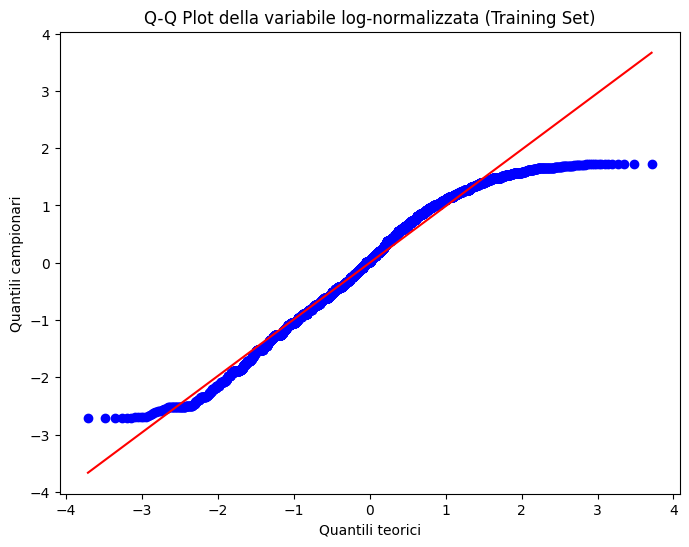

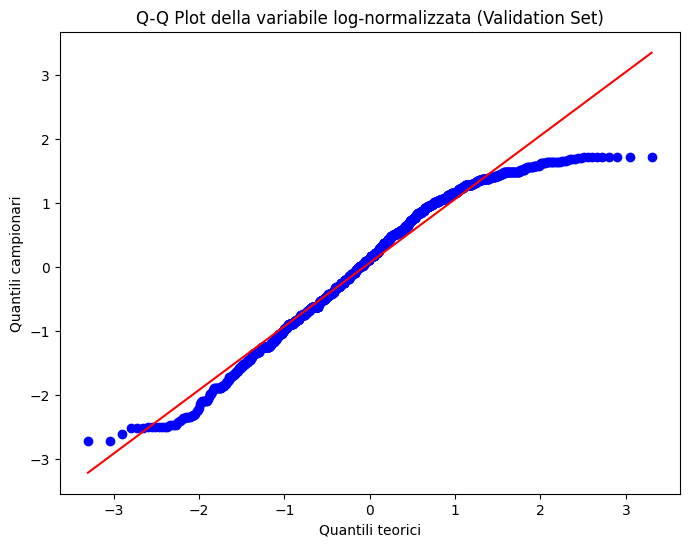

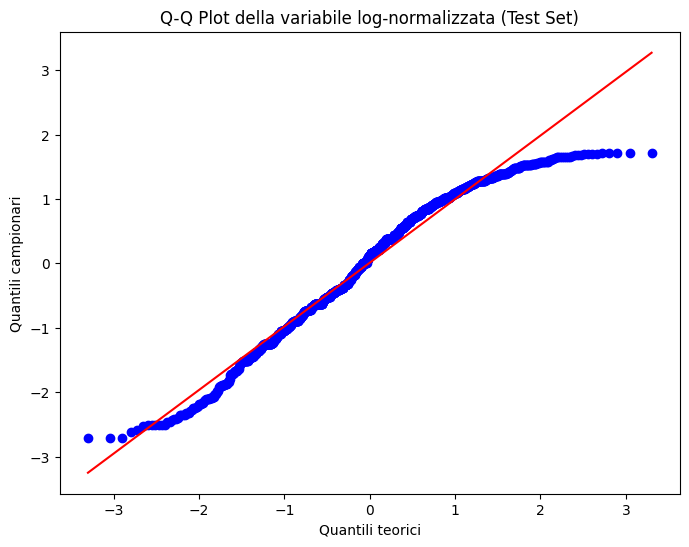

In [23]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assumendo che la variabile log-normalizzata sia salvata come 'Price_scaled' nei tuoi dataset
# Q-Q plot per il training set
plt.figure(figsize=(8, 6))
stats.probplot(train_dataset['Price_scaled_standardized'], dist="norm", plot=plt)
plt.title("Q-Q Plot della variabile log-normalizzata (Training Set)")
plt.xlabel("Quantili teorici")
plt.ylabel("Quantili campionari")
plt.show()

# Q-Q plot per il validation set
plt.figure(figsize=(8, 6))
stats.probplot(val_dataset['Price_scaled_standardized'], dist="norm", plot=plt)
plt.title("Q-Q Plot della variabile log-normalizzata (Validation Set)")
plt.xlabel("Quantili teorici")
plt.ylabel("Quantili campionari")
plt.show()

# Q-Q plot per il test set
plt.figure(figsize=(8, 6))
stats.probplot(test_dataset['Price_scaled_standardized'], dist="norm", plot=plt)
plt.title("Q-Q Plot della variabile log-normalizzata (Test Set)")
plt.xlabel("Quantili teorici")
plt.ylabel("Quantili campionari")
plt.show()


In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler() #Using MinMaxScaler to scale the carat values between 0 and 1 since we are going to use a softmax activation function in the output layer
#train_dataset['Price_scaled'] = scaler.fit_transform(train_dataset[['Price']]) #Fitting scaler only on train dataset
#val_dataset['Price_scaled'] = scaler.transform(val_dataset[['Price']])
#test_dataset['Price_scaled'] = scaler.transform(test_dataset[['Price']])
#train_dataset['Price_scaled'].describe(), val_dataset['Price_scaled'].describe(), test_dataset['Price_scaled'].describe()

In [24]:
import os
import pickle

# Percorso dove vuoi salvare il file scaler.pkl
resources = 'drive/MyDrive/Colab Notebooks/PROGETTODEEP'

# Verifica se la cartella esiste, altrimenti la crea
if not os.path.exists(resources):
    os.makedirs(resources)

# Ora puoi salvare il file scaler.pkl
with open(os.path.join(resources, "lognorm.pkl"), 'wb') as f:
    pickle.dump(scaler, f)


In [25]:
import pickle

with open(resources+"/lognorm.pkl", 'wb') as f:
    pickle.dump(scaler, f)

In [26]:
train_dataset = Bike(train_dataset, base_path, transform=transform)
val_dataset = Bike(val_dataset, base_path, transform=transform)
test_dataset = Bike(test_dataset, base_path, transform=transform)

In [27]:
BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

for images, labels in train_loader:
    print(f"Batch shape: {images.size()}")
    print(f"Labels: {labels}")
    break

Batch shape: torch.Size([64, 3, 224, 224])
Labels: tensor([0.7436, 0.6675, 0.6218, 0.7436, 0.5172, 0.9375, 0.5253, 0.8070, 0.5548,
        0.2613, 0.3464, 0.8893, 0.8888, 0.6335, 0.5435, 0.1866, 0.8030, 0.4496,
        0.5369, 0.8110, 0.0890, 0.6889, 0.6758, 0.8866, 0.0823, 0.7945, 0.4713,
        0.4121, 0.9255, 0.6601, 0.4764, 0.5806, 0.7569, 0.5602, 0.6976, 0.4713,
        0.0823, 0.3746, 0.5406, 0.9407, 0.8150, 0.7601, 0.6976, 0.0682, 0.4580,
        0.4114, 0.3483, 0.5435, 0.1782, 0.8405, 0.5548, 0.6976, 0.4946, 0.2239,
        0.8405, 0.5924, 0.6516, 0.6515, 0.4051, 0.2627, 0.8539, 0.7569, 0.7670,
        0.4403])


In [28]:
class Inception(nn.Module):
    def __init__(self, in_channels, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        self.p1_1 = nn.Conv2d(in_channels, c1, kernel_size=1)
        self.p2_1 = nn.Conv2d(in_channels, c2[0], kernel_size=1)
        self.p2_2 = nn.Conv2d(c2[0], c2[1], kernel_size=3, padding=1)
        self.p3_1 = nn.Conv2d(in_channels, c3[0], kernel_size=1)
        self.p3_2 = nn.Conv2d(c3[0], c3[1], kernel_size=5, padding=2)
        self.p4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.p4_2 = nn.Conv2d(in_channels, c4, kernel_size=1)

    def forward(self, x):
      p1 = F.relu(self.p1_1(x))
      p2 = F.relu(self.p2_2(F.relu(self.p2_1(x))))
      p3 = F.relu(self.p3_2(F.relu(self.p3_1(x))))
      p4 = F.relu(self.p4_2(self.p4_1(x)))
      out = torch.cat((p1, p2, p3, p4), dim=1)
      return out

In [29]:
b1 = nn.Sequential(
    nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
b2 = nn.Sequential(
    nn.Conv2d(64, 64, kernel_size=1),
    nn.ReLU(),
    nn.Conv2d(64, 192, kernel_size=3, padding=1),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

b3 = nn.Sequential(
    Inception(192, 64, (96, 128), (16, 32), 32),
    Inception(256, 128, (128, 192), (32, 96), 64),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

b4 = nn.Sequential(
    Inception(480, 192, (96, 208), (16, 48), 64),
    Inception(512, 160, (112, 224), (24, 64), 64),
    Inception(512, 128, (128, 256), (24, 64), 64),
    Inception(512, 112, (144, 288), (32, 64), 64),
    Inception(528, 256, (160, 320), (32, 128), 128),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

b5 = nn.Sequential(
    Inception(832, 256, (160, 320), (32, 128), 128),
    Inception(832, 384, (192, 384), (48, 128), 128),
    #nn.Dropout(0.4),
    nn.AdaptiveAvgPool2d((1, 1)),
    nn.Flatten())


net = nn.Sequential(
    b1, b2, b3, b4, b5,
    nn.Linear(1024, 1))

In [30]:
X = torch.rand(size=(1, 3, 224, 224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 56, 56])
Sequential output shape:	 torch.Size([1, 192, 28, 28])
Sequential output shape:	 torch.Size([1, 480, 14, 14])
Sequential output shape:	 torch.Size([1, 832, 7, 7])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 1])


To do my regression on prices of bikes

In [31]:
class WeightedMAELoss(nn.Module):
    def __init__(self, alpha=1.5):
        super().__init__()
        self.alpha = alpha

    def forward(self, y_pred, y_true):
        weights = (y_true ** self.alpha) / (y_true.mean() ** self.alpha)  # Normalizza i pesi
        loss = weights * torch.abs(y_pred - y_true)
        return torch.mean(loss)

class HybridLoss(nn.Module):
    def __init__(self, alpha=1.5, lambda_=0.5):

        super(HybridLoss, self).__init__()
        self.weighted_mae = WeightedMAELoss(alpha)
        self.lambda_ = lambda_
        self.mae = nn.L1Loss()  # MAE standard

    def forward(self, y_pred, y_true):
        loss_weighted = self.weighted_mae(y_pred, y_true)
        loss_mae = self.mae(y_pred, y_true)
        return self.lambda_ * loss_weighted + (1 - self.lambda_) * loss_mae


In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from d2l import torch as d2l
from tqdm import tqdm

# Function to compute MAE for any dataset
def compute_mae(net, data_iter, loss_fn, device):
    """Compute the MAE for a model on a dataset."""
    net.eval()
    metric = [0.0, 0]  # Sum of errors, number of samples
    with torch.no_grad():
        for X, y in data_iter:
            X, y = X.to(device), y.to(device)
            y_hat = net(X).view(-1)
            metric[0] += torch.sum(torch.abs(y_hat - y)).item()
            metric[1] += y.numel()
    mae = (metric[0] / metric[1])
    return mae

# Funzione di training
def train(net, train_iter, test_iter, num_epochs, lr, save_path="best_model.pth", device=None):
    """Train a regression model with a GPU."""
    def init_weights(m):
        if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
            nn.init.xavier_uniform_(m.weight)

    net.apply(init_weights)
    print(f'Training on {device}')
    net.to(device)
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    #loss_fn = nn.L1Loss()
    loss_fn = HybridLoss(alpha=1.5, lambda_=0.5)

    best_mae = float('inf')
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train mae', 'test mae'])
    timer = d2l.Timer()
    initial_mae = compute_mae(net, test_iter, loss_fn, device)
    animator.add(0, (0, initial_mae))

    for epoch in range(num_epochs):
        metric = [0.0, 0]  # Sum of errors, number of samples
        net.train()
        train_loss = 0.0
        total_loss = 0.0
        for X, y in tqdm(train_iter, desc=f"Epoch {epoch+1}/{num_epochs}"):
            X, y = X.to(device), y.to(device).unsqueeze(1)
            y_hat = net(X)
            loss = loss_fn(y_hat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            total_loss += loss.item() * X.size(0)
            metric[0] += torch.sum(torch.abs(y_hat.view(-1) - y.view(-1))).item()
            metric[1] += y.numel()

        average_train_loss = total_loss / len(train_iter.dataset)

        # Compute train MAE
        train_mae = metric[0] / metric[1]

        # Compute test MAE
        test_mae = compute_mae(net, test_iter, loss_fn, device)

        # Save the model if it achieves the best test MAE
        if test_mae < best_mae:
            best_mae = test_mae
            torch.save(net.state_dict(), save_path)


        # Update the animator for real-time plotting
        animator.add(epoch + 1, (train_mae, test_mae))
        print(f'Epoch {epoch+1}/{num_epochs}, Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}')
        #print(f'Time elapsed: {timer.stop():.2f}s')

    print(f'Finished training. Best test MAE: {best_mae:.4f}. Model saved at {save_path}')

Epoch 20/20, Train MAE: 0.1397, Test MAE: 0.1446
Finished training. Best test MAE: 0.1446. Model saved at best_regression_model.pth


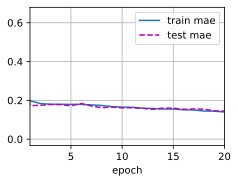

In [33]:
import torch
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = net.to(device)
lr = 0.001
num_epochs = 20
train(net, train_loader, val_loader, num_epochs, lr, save_path="best_regression_model.pth", device=device)

In [34]:
model_path = resources + "/best_regression_model.pth"
torch.save(net.state_dict(), model_path)
net.load_state_dict(torch.load(model_path, map_location=device))

<ipython-input-34-6137f32146ad>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(model_path, map_location=device))


<All keys matched successfully>

In [35]:
from google.colab import drive
import os

# Monta il Google Drive
drive.mount('/content/drive')

# Imposta il percorso al modello
resources = '/content/drive/MyDrive/Colab Notebooks/PROGETTODEEP'
model_path = resources + "/best_regression_model.pth"

# Verifica se il file esiste
if os.path.exists(model_path):
    print(f"Il file {model_path} esiste!")
    net.load_state_dict(torch.load(model_path, map_location=device))
else:
    print(f"Il file {model_path} non esiste! Controlla il percorso.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Il file /content/drive/MyDrive/Colab Notebooks/PROGETTODEEP/best_regression_model.pth esiste!


<ipython-input-35-6c9c25acd476>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(model_path, map_location=device))


In [48]:
# Step 1: Funzione per invertire la standardizzazione aggiuntiva
def inverse_standardization(data, mean, std):
    """
    Riporta i dati standardizzati alla scala log-normalizzata.
    :param data: array di dati standardizzati.
    :param mean: media calcolata durante la standardizzazione.
    :param std: deviazione standard calcolata durante la standardizzazione.
    :return: array di dati nella scala log-normalizzata.
    """
    return data * std + mean

# Step 2: Inversione delle trasformazioni per predizioni
sample = next(iter(test_loader))  # Carica un batch di test
images, labels = sample  # Divide le immagini e i target
images = images.to(device)

# Modalità di valutazione e inferenza
net.eval()
with torch.no_grad():
    y_hat = net(images)  # Genera predizioni del modello

# Converti le predizioni in numpy array
y_hat = y_hat.cpu().numpy()

# Inversione della standardizzazione sulle predizioni
y_hat_log_normalized = inverse_standardization(y_hat, price_mean, price_std)

# Inversione della log-normalizzazione sulle predizioni
y_hat_original = scaler.inverse_transform(y_hat_log_normalized)

# Inversione della standardizzazione sui target
y_true_log_normalized = inverse_standardization(labels.numpy().reshape(-1, 1), price_mean, price_std)

# Inversione della log-normalizzazione sui target
y_true_original = scaler.inverse_transform(y_true_log_normalized)

# Limita a 16 immagini per la visualizzazione
num_images = min(len(images), 16)
images = images[:num_images].cpu()
y_hat_original = y_hat_original[:num_images]
y_true_original = y_true_original[:num_images]

# Creazione dei subplot
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for i, ax in enumerate(axes.flat[:num_images]):
    image = images[i].permute(1, 2, 0) # Cambia la forma a HxWxC
    mean = torch.tensor(mean).view(1, 1, 3).cpu()  # Adatta la forma a (1,1,3) per immagini RGB
    std = torch.tensor(std).view(1, 1, 3).cpu()
    image = image * std + mean  # Inversione della normalizzazione
    #image = (image * std.cpu()) + mean.cpu()  # Denormalizza l'immagine
    error = abs(y_hat_original[i][0] - y_true_original[i][0])  # Calcola l'errore assoluto
    error_percentage = error / y_true_original[i][0] * 100  # Calcola l'errore percentuale
    color = "red" if error_percentage > 15 else "green"  # Colore in base all'errore

    ax.imshow(image)
    ax.set_title(f"Predicted: {y_hat_original[i][0]:.2f}\nActual: {y_true_original[i][0]:.2f}",
                 color=color, fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()


<ipython-input-48-265c44f0b8fb>:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mean = torch.tensor(mean).view(1, 1, 3).cpu()  # Adatta la forma a (1,1,3) per immagini RGB
<ipython-input-48-265c44f0b8fb>:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  std = torch.tensor(std).view(1, 1, 3).cpu()


In [49]:
import numpy as np

# Assumendo che y_true e y_hat siano numpy arrays
# Calcolo dell'errore relativo per ogni esempio
relative_errors = np.abs(y_true_original - y_hat_original) / y_true_original

# Precisione relativa per ogni esempio
relative_accuracy = 1 - relative_errors

mae = np.mean(np.abs((y_true_original - y_hat_original) /y_true_original))

# Precisione media (in %)
mean_accuracy = np.mean(relative_accuracy) * 100

print(f"Precisione relativa media: {mean_accuracy:.2f}%")
# Calcola l'errore relativo medio dall'array
mean_relative_error = relative_errors.mean() * 100  # Calcola la media e scala al %
print(f"Errore relativo medio: {mean_relative_error:.2f}%")
print(f"MAE: {mae}")

Precisione relativa media: 87.68%
Errore relativo medio: 12.32%
MAE: 0.12322969734668732


#Model 2

In [1]:
from google.colab import drive
drive.mount('/content/drive')
resources = "drive/MyDrive/Colab Notebooks/RISORSE"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install d2l

In [3]:
from d2l import torch as d2l
import torch
from torch import nn
from torch.nn import functional as F
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
path = kagglehub.dataset_download("tysonpo/bike-ads-images-prices-specifications")

print("Path to dataset files:", path)

100%|██████████| 196M/196M [00:11<00:00, 17.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/tysonpo/bike-ads-images-prices-specifications/versions/4


In [4]:
main = print(os.listdir(path))

['images', 'combined_price-only.csv', 'data_ebay.json', 'data_bike_exchange.json']


In [6]:
folder_jpg = os.path.join(path, 'images')
absolute_path = os.path.abspath(folder_jpg)

# Stampa il percorso assoluto della cartella
print(f"Il percorso assoluto della cartella 'images' è: {absolute_path}")

print(os.listdir(folder_jpg))

Il percorso assoluto della cartella 'images' è: /root/.cache/kagglehub/datasets/tysonpo/bike-ads-images-prices-specifications/versions/4/images
['103123761.jpg', '8947.jpg', '1366.jpg', '3710.jpg', '2874.jpg', '140470013.jpg', '5958.jpg', '186020259.jpg', '160161504.jpg', '8231.jpg', '301.jpg', '8658.jpg', '8917.jpg', '174084278.jpg', '563.jpg', '8948.jpg', '7216.jpg', '2545.jpg', '102730884.jpg', '126647475.jpg', '2136.jpg', '5061.jpg', '454.jpg', '3389.jpg', '6198.jpg', '8653.jpg', '113091131.jpg', '2011.jpg', '7152.jpg', '7566.jpg', '186528029.jpg', '6318.jpg', '7141.jpg', '6136.jpg', '4719.jpg', '3320.jpg', '164618032.jpg', '160113912.jpg', '177850224.jpg', '136488083.jpg', '2550.jpg', '183428845.jpg', '835.jpg', '8181.jpg', '8204.jpg', '6815.jpg', '3936.jpg', '3273.jpg', '2581.jpg', '2933.jpg', '7942.jpg', '2377.jpg', '146256158.jpg', '4146.jpg', '6913.jpg', '3388.jpg', '6124.jpg', '8400.jpg', '6066.jpg', '4023.jpg', '4278.jpg', '136691004.jpg', '558.jpg', '3072.jpg', '3933.jpg', 

In [7]:
print("Files in the main folder:", os.listdir(path))

for root, dirs, files in os.walk(path):
    print(f"\nFiles in '{root}': {files}")

Files in the main folder: ['images', 'combined_price-only.csv', 'data_ebay.json', 'data_bike_exchange.json']

Files in '/root/.cache/kagglehub/datasets/tysonpo/bike-ads-images-prices-specifications/versions/4': ['combined_price-only.csv', 'data_ebay.json', 'data_bike_exchange.json']

Files in '/root/.cache/kagglehub/datasets/tysonpo/bike-ads-images-prices-specifications/versions/4/images': ['103123761.jpg', '8947.jpg', '1366.jpg', '3710.jpg', '2874.jpg', '140470013.jpg', '5958.jpg', '186020259.jpg', '160161504.jpg', '8231.jpg', '301.jpg', '8658.jpg', '8917.jpg', '174084278.jpg', '563.jpg', '8948.jpg', '7216.jpg', '2545.jpg', '102730884.jpg', '126647475.jpg', '2136.jpg', '5061.jpg', '454.jpg', '3389.jpg', '6198.jpg', '8653.jpg', '113091131.jpg', '2011.jpg', '7152.jpg', '7566.jpg', '186528029.jpg', '6318.jpg', '7141.jpg', '6136.jpg', '4719.jpg', '3320.jpg', '164618032.jpg', '160113912.jpg', '177850224.jpg', '136488083.jpg', '2550.jpg', '183428845.jpg', '835.jpg', '8181.jpg', '8204.jpg', 

In [8]:
import pandas as pd

# Percorso completo al file CSV
csv_file_path = '/root/.cache/kagglehub/datasets/tysonpo/bike-ads-images-prices-specifications/versions/4/combined_price-only.csv'

# Leggi il file CSV
df = pd.read_csv(csv_file_path)

# Mostra le prime righe del file
print(df.head(50))

    ID    Price
0    0  1399.99
1    2  2995.00
2    3  1049.00
3    4   929.35
4    5   199.00
5    6  2999.99
6    7  3950.00
7    8   900.00
8    9   900.00
9   10   469.85
10  11   585.00
11  12  1099.99
12  13  1199.00
13  14   910.00
14  15  1400.00
15  16  1795.00
16  17   249.00
17  18  6250.00
18  19  1295.00
19  20  1500.00
20  21  2000.00
21  22  2200.00
22  23  1799.95
23  24  1929.99
24  25  3400.00
25  26  6195.00
26  27   749.85
27  28  1249.00
28  29  2400.00
29  30   699.35
30  31   999.99
31  32  2500.00
32  33  1200.00
33  34   640.00
34  35  1200.00
35  36  2200.00
36  37  1300.00
37  38   595.00
38  39  1285.00
39  40  2600.00
40  41  2000.00
41  42  2399.99
42  43  1599.85
43  44  1995.00
44  45  1929.99
45  46  1900.00
46  47  1200.00
47  48  1000.00
48  49  1199.99
49  50  2500.00


In [9]:
print(df['Price'].describe())

count    10052.000000
mean      1921.560166
std       2042.453002
min          0.010000
25%        475.000000
50%       1125.000000
75%       2799.990000
max      15684.630000
Name: Price, dtype: float64


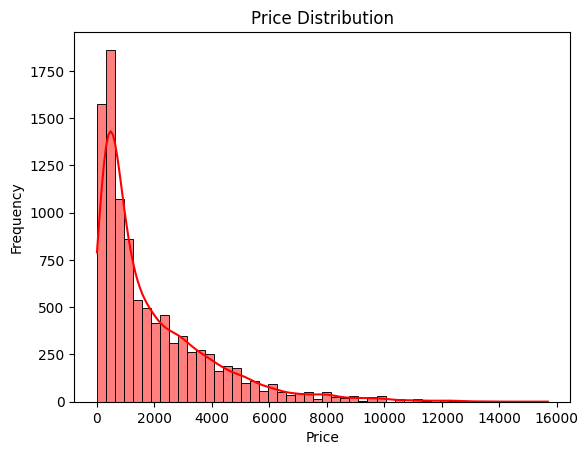

In [10]:
import numpy as np
sns.histplot(df['Price'], bins=50, kde=True, color='red')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

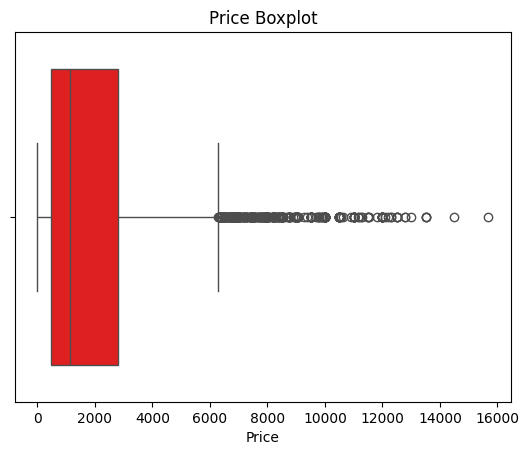

In [11]:
sns.boxplot(x=df['Price'], color='red')
plt.title("Price Boxplot")
plt.show()

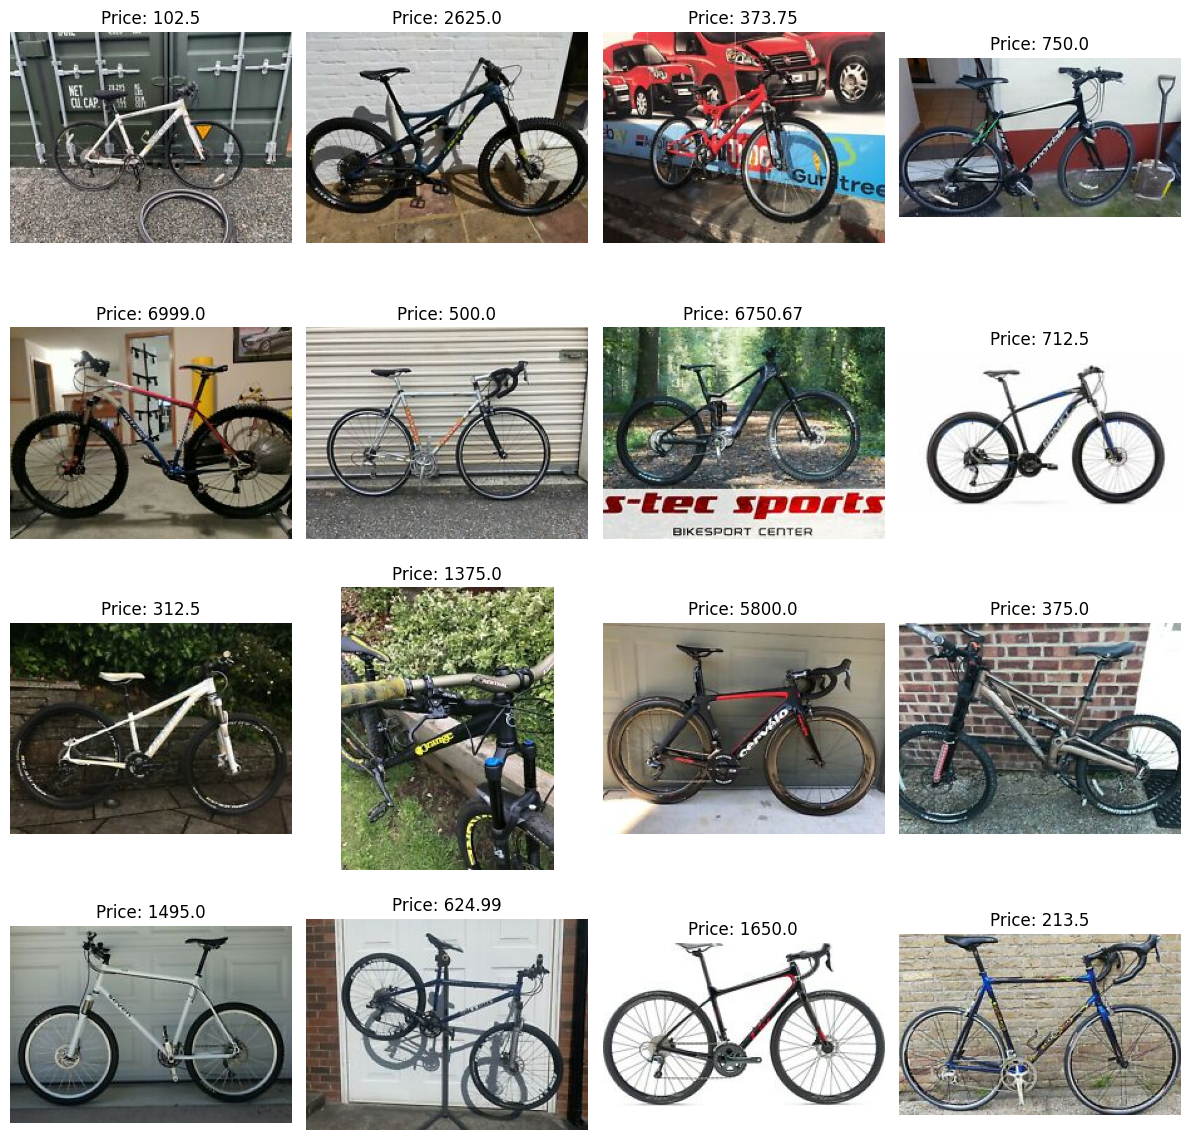

In [12]:
import random
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import os

def display_random_bikes_in_grid(df, n=16, base_path='/root/.cache/kagglehub/datasets/tysonpo/bike-ads-images-prices-specifications/versions/4/images', image_extension='.jpg'):
    # Estrai un campione casuale di righe
    random_rows = df.sample(n)

    # Imposta il layout della griglia (4 righe per 4 colonne)
    rows, cols = 4, 4
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    axes = axes.flatten()

    # Ottieni una lista di tutti i file nella cartella delle immagini
    image_files = os.listdir(base_path)

    # Visualizza ogni immagine nel campione casuale
    for i, (ax, (_, row)) in enumerate(zip(axes, random_rows.iterrows())):
        # Ora 'row' è definito nel contesto del ciclo
        image_filename = str(int(row['ID'])) + '.jpg'  # Aggiungi l'estensione .jpg al valore di ID
        path = Path(base_path) / image_filename # Crea il percorso completo per il file immagine

        # Se il file esiste, apri l'immagine
        if path.is_file():
            image = Image.open(path)
            ax.imshow(image)
            ax.axis('off')  # Disabilita gli assi
            ax.set_title(f"Price: {row['Price']}")  # Mostra il prezzo come titolo
        else:
            ax.text(0.5, 0.5, "Image not found", ha='center', va='center', fontsize=12, color='red')

    # Ottimizza la disposizione delle immagini
    plt.tight_layout()
    plt.show()

# Esegui la funzione (con i dati del tuo DataFrame e il percorso base corretto)
display_random_bikes_in_grid(df, n=16, base_path='/root/.cache/kagglehub/datasets/tysonpo/bike-ads-images-prices-specifications/versions/4/images', image_extension='.jpg')


In [70]:
import os
import random
from PIL import Image
import torch
from torchvision import transforms
from pathlib import Path

# Impostazioni per la riproducibilità
SEED = 42
random.seed(SEED)
torch.manual_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

# Configura il dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Utilizzando il dispositivo: {device}")

# Percorso base delle immagini
base_path = '/root/.cache/kagglehub/datasets/tysonpo/bike-ads-images-prices-specifications/versions/4/images'  # Modifica se necessario

# Trasformazioni per i dati di input (Resize, ToTensor) + trasferimento su CUDA
data_augmentation = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

sample_size = 500  # Numero di immagini da caricare
image_tensors = []  # Lista per memorizzare i tensori delle immagini

# Campione casuale di indici dal DataFrame
sampled_images = random.sample(range(len(df)), min(len(df), sample_size))

# Loop per caricare le immagini
for idx in sampled_images:
    row = df.iloc[idx]

    # Rimuove la parte decimale e converte ID in stringa
    image_filename = str(int(row['ID'])) + '.jpg'  # Assicurati che il nome del file corrisponda all'ID senza decimali

    # Costruisce il percorso dell'immagine
    img_path = Path(base_path) / image_filename

    # Controlla se il file esiste
    if img_path.is_file():
        try:
            # Carica e trasforma l'immagine
            img = Image.open(img_path).convert("RGB")
            tensor = data_augmentation(img).to(device)  # Sposta su CUDA
            image_tensors.append(tensor)
        except Exception as e:
            print(f"Errore con l'immagine {img_path}: {e}")
    else:
        print(f"Immagine non trovata: {img_path}")

# Se ci sono immagini valide, calcola la media e la deviazione standard
if image_tensors:
    stacked_images = torch.stack(image_tensors).to(device)  # Sposta il batch su CUDA

    mean = stacked_images.mean(dim=[0, 2, 3])
    std = stacked_images.std(dim=[0, 2, 3])

    print(f"Media: {mean}")
    print(f"Deviazione standard: {std}")
else:
    print("Nessuna immagine valida trovata.")


Utilizzando il dispositivo: cuda
Media: tensor([0.6189, 0.6080, 0.5705], device='cuda:0')
Deviazione standard: tensor([0.3034, 0.3019, 0.3193], device='cuda:0')


In [71]:
#import os
#import random
#from PIL import Image
#import torch
#from torchvision import transforms
#from pathlib import Path

# Impostazioni per la riproducibilità
#SEED = 42
#random.seed(SEED)
#torch.manual_seed(SEED)
#os.environ['PYTHONHASHSEED'] = str(SEED)

# Percorso base delle immagini
#base_path = '/root/.cache/kagglehub/datasets/tysonpo/bike-ads-images-prices-specifications/versions/4/images'  # Modifica se necessario

# Trasformazioni per i dati di input (Resize, ToTensor)
#data_augmentation = transforms.Compose([
  #  transforms.ToTensor()
##    transforms.Resize((224, 224)),
#])

#sample_size = 500  # Numero di immagini da caricare
#image_tensors = []  # Lista per memorizzare i tensori delle immagini

# Campione casuale di indici dal DataFrame
#sampled_images = random.sample(range(len(df)), min(len(df), sample_size))

# Loop per caricare le immagini
#for idx in sampled_images:
 #   row = df.iloc[idx]

    # Rimuove la parte decimale e converte ID in stringa
 #   image_filename = str(int(row['ID'])) + '.jpg'  # Assicurati che il nome del file corrisponda all'ID senza decimali

    # Costruisce il percorso dell'immagine
  #  img_path = Path(base_path) / image_filename

    # Controlla se il file esiste
    #if img_path.is_file():
   #     try:
            # Carica e trasforma l'immagine
     #       img = Image.open(img_path).convert("RGB")
      #      tensor = data_augmentation(img)
       #     image_tensors.append(tensor)
        #except Exception as e:
         #   print(f"Errore con l'immagine {img_path}: {e}")
    #else:
     #   print(f"Immagine non trovata: {img_path}")

# Se ci sono immagini valide, calcola la media e la deviazione standard
#if image_tensors:
 #   stacked_images = torch.stack(image_tensors)

  #  mean = stacked_images.mean(dim=[0, 2, 3])
   # std = stacked_images.std(dim=[0, 2, 3])

    #print(f"Media: {mean}")
    #print(f"Deviazione standard: {std}")
#else:
 #   print("Nessuna immagine valida trovata.")


In [72]:
import random
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import torch
from torchvision import transforms
from pathlib import Path
from torchvision.io import read_image
import pandas as pd
from torch.utils.data import Dataset
from pathlib import Path
from PIL import Image
import torch

SEED = 42
random.seed(SEED)
torch.manual_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)


mean = [0.6015, 0.5943, 0.5577]
std = [0.3002, 0.2982, 0.3154]

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

class Bike(Dataset):
    def __init__(self, dataframe, base_path, transform=None):
        self.dataframe = dataframe
        self.base_path = base_path
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        image_filename = str(int(row['ID'])) + '.jpg'
        img_path = Path(self.base_path) / image_filename
        image = Image.open(img_path).convert("RGB")
        #image = read_image(img_path).float() / 255.0
        label = torch.tensor(row['Price'], dtype=torch.float)

        if self.transform:
            image = self.transform(image)

        return image, label


In [73]:
from sklearn.model_selection import train_test_split
train_dataset, test_dataset = train_test_split(df, test_size=0.3, random_state=42)
test_dataset, val_dataset = train_test_split(test_dataset, test_size=0.5, random_state=42)

In [74]:
train_dataset = Bike(train_dataset, base_path, transform=transform)
val_dataset = Bike(val_dataset, base_path, transform=transform)
test_dataset = Bike(test_dataset, base_path, transform=transform)

In [75]:


BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

for images, labels in train_loader:
    print(f"Batch shape: {images.size()}")
    print(f"Labels: {labels}")
    break

Batch shape: torch.Size([64, 3, 224, 224])
Labels: tensor([ 4888.8799,  1400.0000,   599.0000,  4699.0000,  3150.0000,   575.0000,
         1194.0000,  2249.0000,    70.0000,   250.0000,   156.2500,   386.2500,
           28.0000,  1500.0000,  3600.0000, 11250.0000,   150.0000,  4300.0000,
          325.0000,   600.0000,   835.0000,  2500.0000,   562.5000,  3125.0000,
         1125.0000,   818.7500,  4499.9902,  1570.0000,   401.0000,   312.5000,
          749.9900,  5499.9902,   937.5000,  4799.9902,    75.0000,   203.7500,
          680.0000,  1575.0000,    63.7500,  1187.5000,   218.7500,   193.7500,
         1275.3400,  1250.0000,  3900.0000,  4999.9902,    63.7500,  1125.0000,
         5399.9902,  2350.0000,  4374.9902,  1280.0000,   115.0000,   312.5000,
         2835.0000,   123.7500,   812.5000,   265.0000,  1687.5000,   249.9500,
          100.0000,  3519.9900,  1875.0000,  2500.0000])


In [76]:
class Inception(nn.Module):
    def __init__(self, in_channels, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        self.p1_1 = nn.Conv2d(in_channels, c1, kernel_size=1)
        self.p2_1 = nn.Conv2d(in_channels, c2[0], kernel_size=1)
        self.p2_2 = nn.Conv2d(c2[0], c2[1], kernel_size=3, padding=1)
        self.p3_1 = nn.Conv2d(in_channels, c3[0], kernel_size=1)
        self.p3_2 = nn.Conv2d(c3[0], c3[1], kernel_size=5, padding=2)
        self.p4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.p4_2 = nn.Conv2d(in_channels, c4, kernel_size=1)

    def forward(self, x):
      p1 = F.relu(self.p1_1(x))
      p2 = F.relu(self.p2_2(F.relu(self.p2_1(x))))
      p3 = F.relu(self.p3_2(F.relu(self.p3_1(x))))
      p4 = F.relu(self.p4_2(self.p4_1(x)))
      out = torch.cat((p1, p2, p3, p4), dim=1)
      return out

In [77]:
b1 = nn.Sequential(
    nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
b2 = nn.Sequential(
    nn.Conv2d(64, 64, kernel_size=1),
    nn.ReLU(),
    nn.Conv2d(64, 192, kernel_size=3, padding=1),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

b3 = nn.Sequential(
    Inception(192, 64, (96, 128), (16, 32), 32),
    Inception(256, 128, (128, 192), (32, 96), 64),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

b4 = nn.Sequential(
    Inception(480, 192, (96, 208), (16, 48), 64),
    Inception(512, 160, (112, 224), (24, 64), 64),
    Inception(512, 128, (128, 256), (24, 64), 64),
    Inception(512, 112, (144, 288), (32, 64), 64),
    Inception(528, 256, (160, 320), (32, 128), 128),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

b5 = nn.Sequential(
    Inception(832, 256, (160, 320), (32, 128), 128),
    Inception(832, 384, (192, 384), (48, 128), 128),
    #nn.Dropout(0.4),
    nn.AdaptiveAvgPool2d((1, 1)),
    nn.Flatten())


net = nn.Sequential(
    b1, b2, b3, b4, b5,
    nn.Linear(1024, 50),
    nn.ReLU(),
    nn.Linear(50, 1))

In [78]:
X = torch.rand(size=(1, 3, 224, 224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 56, 56])
Sequential output shape:	 torch.Size([1, 192, 28, 28])
Sequential output shape:	 torch.Size([1, 480, 14, 14])
Sequential output shape:	 torch.Size([1, 832, 7, 7])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 50])
ReLU output shape:	 torch.Size([1, 50])
Linear output shape:	 torch.Size([1, 1])


In [79]:
import torch
import torch.nn as nn
import torch.optim as optim
from d2l import torch as d2l
from tqdm import tqdm

# Function to compute RMSE for any dataset
def compute_rmse(net, data_iter, loss_fn, device):
    """Compute the RMSE for a model on a dataset."""
    net.eval()
    metric = [0.0, 0]  # Sum of squared errors, number of samples
    with torch.no_grad():
        for X, y in data_iter:
            X, y = X.to(device), y.to(device)
            y_hat = net(X).view(-1)
            metric[0] += torch.sum((y_hat - y) ** 2).item()
            metric[1] += y.numel()
    rmse = (metric[0] / metric[1]) ** 0.5
    return rmse

# Funzione di training
def train(net, train_iter, test_iter, num_epochs, lr, save_path="best_model.pth", device=None):
    """Train a regression model with a GPU."""
    def init_weights(m):
        if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
            nn.init.xavier_uniform_(m.weight)

    net.apply(init_weights)
    print(f'Training on {device}')
    net.to(device)
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    loss_fn = nn.MSELoss()

    best_rmse = float('inf')
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train rmse', 'test rmse'])
    timer = d2l.Timer()
    initial_rmse = compute_rmse(net, test_iter, loss_fn, device)
    animator.add(0, (0, initial_rmse))

    for epoch in range(num_epochs):
        metric = [0.0, 0]  # Sum of squared errors, number of samples
        net.train()
        train_loss = 0.0
        total_loss = 0.0
        for X, y in tqdm(train_iter, desc=f"Epoch {epoch+1}/{num_epochs}"):
            X, y = X.to(device), y.to(device).unsqueeze(1)
            y_hat = net(X)
            loss = loss_fn(y_hat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            total_loss += loss.item() * X.size(0)
            metric[0] += torch.sum((y_hat.view(-1) - y.view(-1)) ** 2).item()
            metric[1] += y.numel()

        average_train_loss = total_loss / len(train_iter.dataset)

        # Compute train RMSE
        train_rmse = (metric[0] / metric[1]) ** 0.5

        # Compute test RMSE
        test_rmse = compute_rmse(net, test_iter, loss_fn, device)

        # Save the model if it achieves the best test RMSE
        if test_rmse < best_rmse:
            best_rmse = test_rmse
            torch.save(net.state_dict(), save_path)

        # Update the animator for real-time plotting
        animator.add(epoch + 1, (train_rmse, test_rmse))
        print(f'Epoch {epoch+1}/{num_epochs}, Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}')
        #print(f'Time elapsed: {timer.stop():.2f}s')

    print(f'Finished training. Best test RMSE: {best_rmse:.4f}. Model saved at {save_path}')


Epoch 20/20, Train RMSE: 1373.4711, Test RMSE: 1490.7275
Finished training. Best test RMSE: 1461.8037. Model saved at best_regression_model2.pth


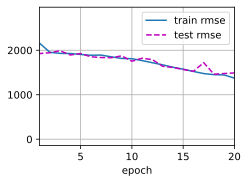

In [80]:
import torch
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = net.to(device)
lr = 0.0001
num_epochs = 20
train(net, train_loader, val_loader, num_epochs, lr, save_path="best_regression_model2.pth", device=device)

In [81]:
model_path = resources + "/best_regression_model2.pth"
torch.save(net.state_dict(), model_path)
net.load_state_dict(torch.load(model_path, map_location=device))

<ipython-input-81-1c618d3f70b8>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(model_path, map_location=device))


<All keys matched successfully>

In [82]:
from google.colab import drive
import os

# Monta il Google Drive
drive.mount('/content/drive')

# Imposta il percorso al modello
resources = '/content/drive/MyDrive/Colab Notebooks/PROGETTODEEP'
model_path = resources + "/best_regression_model2.pth"

# Verifica se il file esiste
if os.path.exists(model_path):
    print(f"Il file {model_path} esiste!")
    net.load_state_dict(torch.load(model_path, map_location=device))
else:
    print(f"Il file {model_path} non esiste! Controlla il percorso.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Il file /content/drive/MyDrive/Colab Notebooks/PROGETTODEEP/best_regression_model2.pth esiste!


<ipython-input-82-a802d6eaa591>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(model_path, map_location=device))


In [98]:
import torch
import matplotlib.pyplot as plt

def predict_and_visualize(net, test_loader, device):
    """Effettua previsioni e visualizza i risultati."""
    print("🔍 INIZIO FUNZIONE PREDICT_AND_VISUALIZE!")  # Forza una stampa all'inizio

    try:
        net.eval()
        net.to(device)  # Assicura che il modello sia sulla stessa device
        print("✔️ Modello spostato su device:", device)

        # Controlliamo che il DataLoader non sia vuoto
        print("🔍 Cerco di caricare un batch dal test_loader...")
        sample = next(iter(test_loader))  # Carica un batch di test
        print("✔️ Batch caricato con successo!")

        images, labels = sample  # Divide le immagini e i target
        print(f"✔️ Caricato un batch di test con {len(images)} immagini e {len(labels)} etichette.")

        print(f"Device originale delle immagini: {images.device}")  # Debug

        # ✅ Controlla se CUDA è disponibile
        if device.type == "cuda" and torch.cuda.is_available():
            images = images.to(device, dtype=torch.float32, non_blocking=True)
            labels = labels.to(device, dtype=torch.float32, non_blocking=True)
            print("✔️ Immagini e labels spostate su CUDA.")
        else:
            print("⚠️ Attenzione: CUDA non disponibile, eseguendo su CPU!")

        print(f"Device delle immagini dopo il trasferimento: {images.device}")  # Debug

        # ✅ Controllo prima di inferenza
        if images.device != device:
            print(f"⚠️ ERRORE: Le immagini sono ancora su {images.device}, invece di {device}!")
            return  # Blocca l'esecuzione se c'è un problema

        print("✔️ Immagini pronte per l'inferenza.")

        with torch.no_grad():
            try:
                print("🔍 Eseguo inferenza sul modello...")
                y_hat = net(images).view(-1)  # Genera predizioni del modello
                print(f"✔️ Output del modello generato con shape: {y_hat.shape}")  # Debug
            except RuntimeError as e:
                print(f"❌ ERRORE durante l'inferenza: {e}")
                return  # Termina la funzione se c'è un errore

        # Converti le predizioni in numpy array
        y_hat = y_hat.cpu().numpy()  # Sposta su CPU prima di convertire in NumPy
        y_true = labels.cpu().numpy()  # Sposta su CPU
        print("✔️ Convertito output e labels in NumPy.")

        # Limita a 16 immagini per la visualizzazione
        num_images = min(len(images), 16)
        images = images[:num_images].cpu()  # Sposta solo ora su CPU

        print("✔️ Pronto per la visualizzazione. Genero il grafico.")

        # Creazione dei subplot
        fig, axes = plt.subplots(4, 4, figsize=(12, 12))

        for i, ax in enumerate(axes.flat[:num_images]):
            image = images[i].permute(1, 2, 0).cpu().numpy()  # Sposta solo ora su CPU

            # Debug: Verifica che l'immagine abbia dati validi
            print(f"🔍 Min e Max pixel dell'immagine {i}: {image.min()}, {image.max()}")

            # Normalizza l'immagine tra 0 e 1 se necessario
            if image.max() > 1:
                image = image / 255.0

            # Calcola l'errore assoluto e percentuale
            error = abs(y_hat[i] - y_true[i])
            error_percentage = (error / y_true[i]) * 100 if y_true[i] != 0 else 0

            # Colore del titolo in base all'errore
            color = "red" if error_percentage > 15 else "green"

            ax.imshow(image)
            ax.set_title(f"Pred: {y_hat[i]:.2f}\nActual: {y_true[i]:.2f}",
                         color=color, fontsize=10)
            ax.axis('off')

        plt.tight_layout()
        plt.show()
        print("✔️ Visualizzazione completata con successo!")

    except Exception as e:
        print(f"❌ ERRORE GENERALE: {e}")  # Debug per qualsiasi crash
